In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.util import random_noise
from skimage.restoration import denoise_nl_means
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Наложение и удаление шума

In [46]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

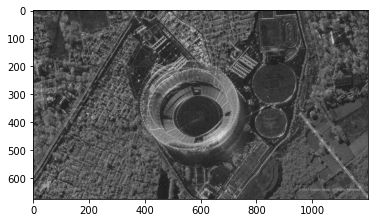

In [47]:
plt.imshow(image_gray, cmap="gray")

In [81]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[229,   0,   0, ...,   0,   0,   0],
       [126,  68,   0, ...,   0,   0,  32],
       [162,  11,   6, ...,  13,  50,   0],
       ...,
       [  0,   6, 141, ...,   0,   0, 105],
       [ 26,   0,   0, ...,  54,  99,   0],
       [ 30,   0,  14, ...,   0,  84,   0]], dtype=uint8)

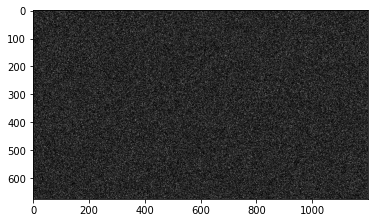

In [82]:
plt.imshow(noise_gauss, cmap="gray")

In [83]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [84]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [85]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

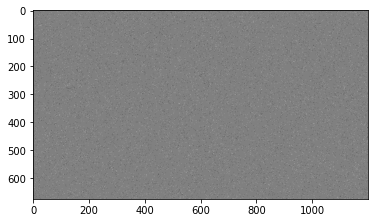

In [86]:
plt.imshow(bg_image, cmap="gray")

In [87]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

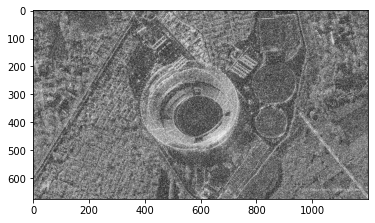

In [88]:
plt.imshow(image_noise_gauss, cmap="gray")

In [89]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4239.23434691358 0.18694949978788222


In [90]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [91]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [92]:
print(mse_gauss_median, ssim_gauss_median)

1034.030974074074 0.42729854374617976


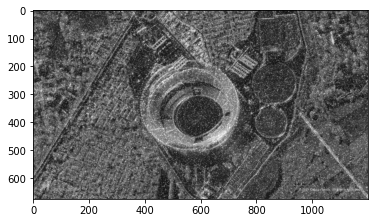

In [93]:
plt.imshow(image_gauss_median, cmap="gray")

In [94]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

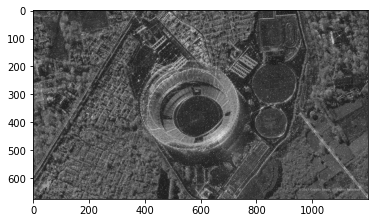

In [95]:
plt.imshow(image_sp, cmap="gray")

In [96]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

387.02924320987654 0.7229272028218258


In [101]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [102]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.94404444444444 0.8160796293211554


# Другие типы фильтров

In [131]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [133]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [139]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [147]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


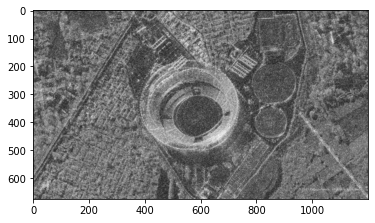

In [148]:
plt.imshow(res, cmap="gray")

In [149]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

1219.7879691358025 0.3984170557811386



# 2D свертка

In [105]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [106]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [127]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [128]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

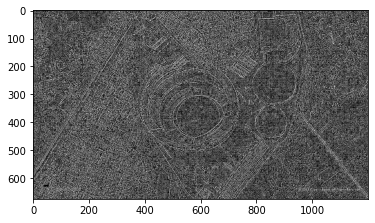

In [129]:
plt.imshow(image_lapl, cmap="gray")

In [4]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [3]:
plt.rcParams['figure.figsize'] = (8, 6)

def show_img(img, title=""):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def to_float01(img):
    if img.dtype == np.uint8:
        return img.astype(np.float32) / 255.0
    else:
        return img.astype(np.float32)

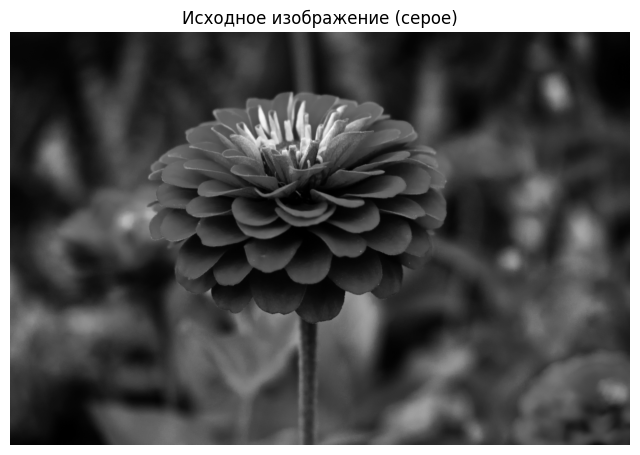

In [5]:

image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img = image_gray.astype(np.float32) / 255.0

show_img(image_gray, "Исходное изображение (серое)")


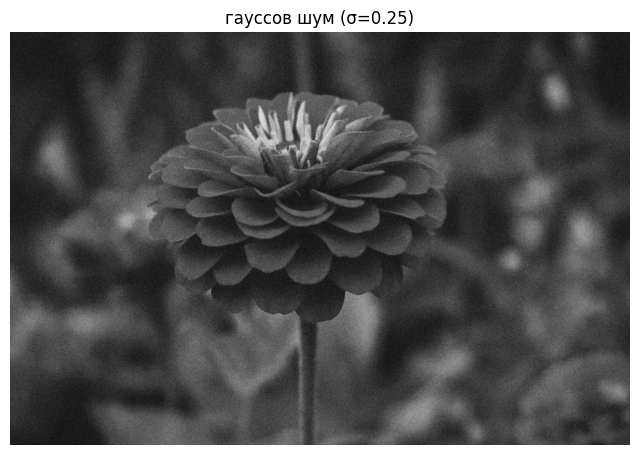

In [7]:


sigma_gauss = 0.25   

gauss_noisy = random_noise(img, mode='gaussian', var=sigma_gauss**2)

show_img(gauss_noisy, f"гауссов шум (σ={sigma_gauss})")




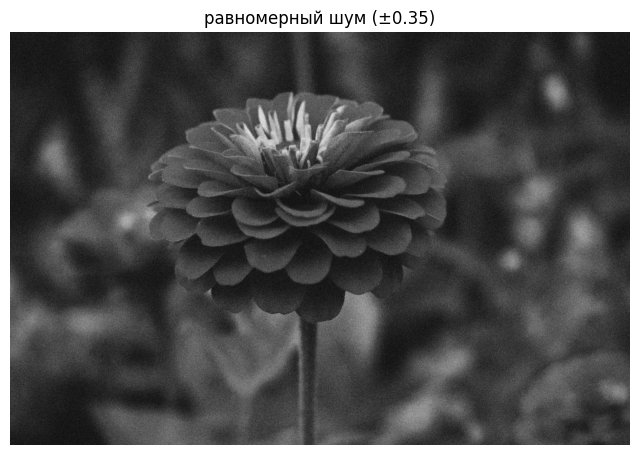

In [8]:

a = 0.35 

uniform_noise = np.random.uniform(-a, a, img.shape)
const_noisy = np.clip(img + uniform_noise, 0, 1)

show_img(const_noisy, f"равномерный шум (±{a})")




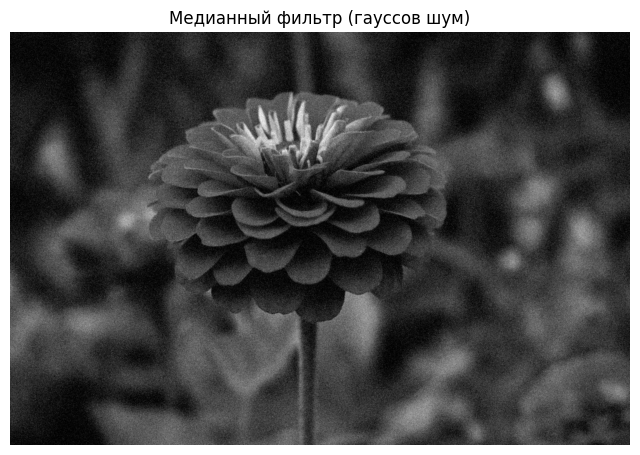

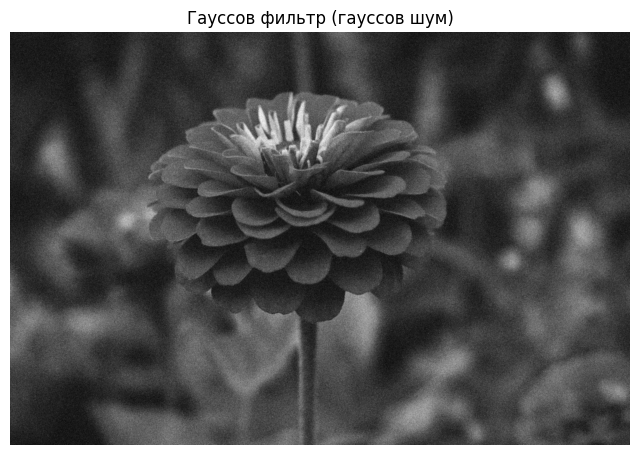

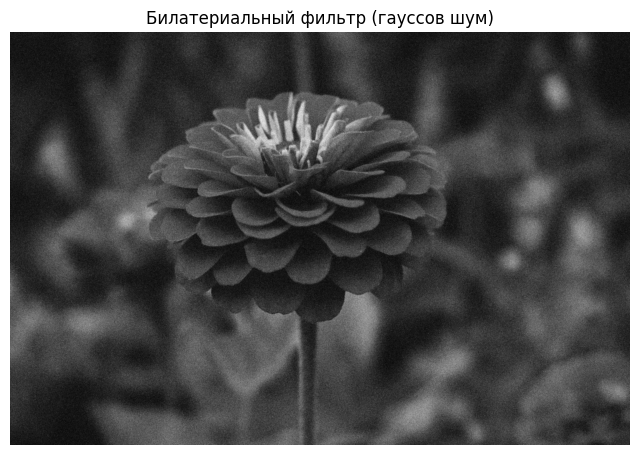

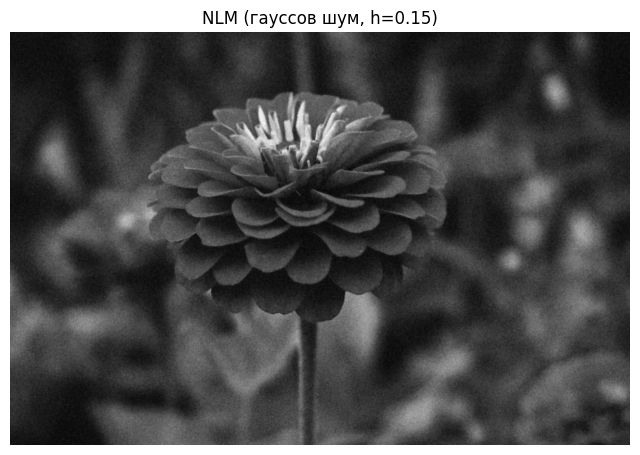

In [9]:

gauss_noisy_u8 = (gauss_noisy * 255).astype(np.uint8)

median_gauss = cv2.medianBlur(gauss_noisy_u8, 5)
show_img(median_gauss, "Медианный фильтр (гауссов шум)")

gauss_filter_gauss = cv2.GaussianBlur(gauss_noisy_u8, (9, 9), 1.5)
show_img(gauss_filter_gauss, "Гауссов фильтр (гауссов шум)")

bil_gauss = cv2.bilateralFilter(gauss_noisy_u8, 9, 50, 50)
show_img(bil_gauss, "Билатериальный фильтр (гауссов шум)")

h_nlm_gauss = 0.15 

nlm_gauss = denoise_nl_means(
    gauss_noisy,
    h=h_nlm_gauss,
    fast_mode=True,
    patch_size=5,
    patch_distance=6
)

show_img(nlm_gauss, f"NLM (гауссов шум, h={h_nlm_gauss})")



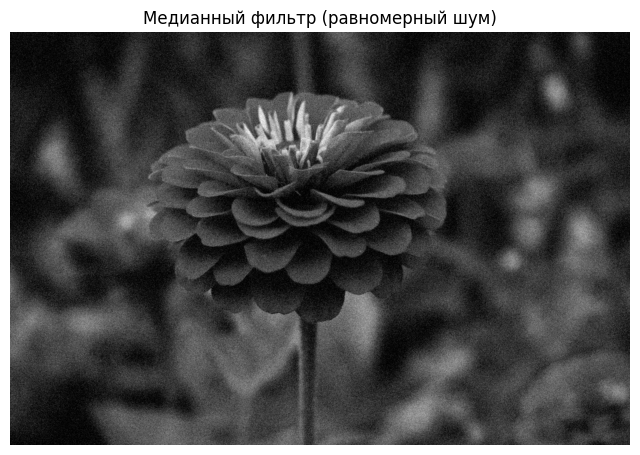

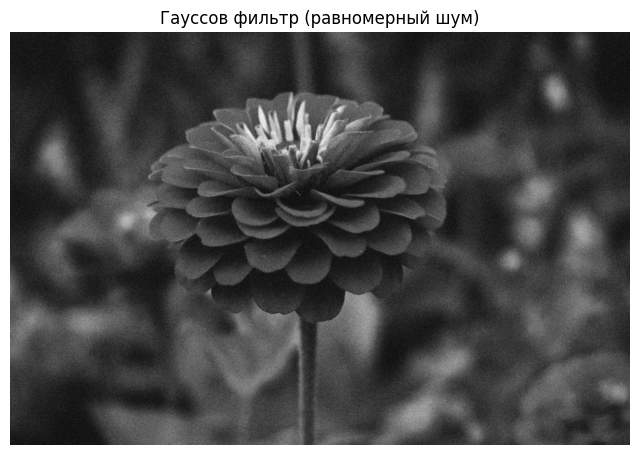

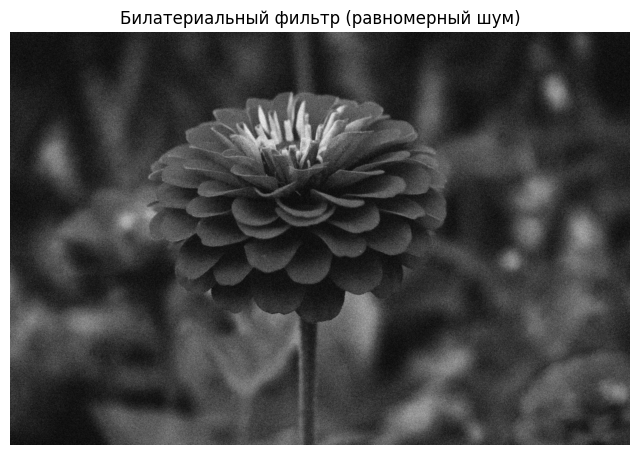

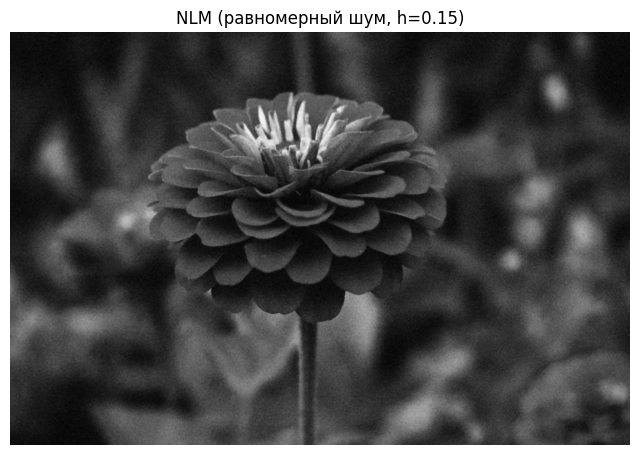

In [10]:

const_noisy_u8 = (const_noisy * 255).astype(np.uint8)

median_const = cv2.medianBlur(const_noisy_u8, 5)
show_img(median_const, "Медианный фильтр (равномерный шум)")

gauss_filter_const = cv2.GaussianBlur(const_noisy_u8, (9, 9), 1.5)
show_img(gauss_filter_const, "Гауссов фильтр (равномерный шум)")

bil_const = cv2.bilateralFilter(const_noisy_u8, 9, 50, 50)
show_img(bil_const, "Билатериальный фильтр (равномерный шум)")

h_nlm_const = 0.15

nlm_const = denoise_nl_means(
    const_noisy,
    h=h_nlm_const,
    fast_mode=True,
    patch_size=5,
    patch_distance=6
)

show_img(nlm_const, f"NLM (равномерный шум, h={h_nlm_const})")



In [36]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


In [12]:

orig = to_float01(image_gray)  

def eval_metrics(original, processed):
    original_f = to_float01(original)
    processed_f = to_float01(processed)
    psnr = peak_signal_noise_ratio(original_f, processed_f, data_range=1.0)
    ssim = structural_similarity(original_f, processed_f, data_range=1.0)
    return psnr, ssim


results_gauss = {
    "median":   eval_metrics(orig, median_gauss),
    "gaussian": eval_metrics(orig, gauss_filter_gauss),
    "bilateral":eval_metrics(orig, bil_gauss),
    "nlm":      eval_metrics(orig, nlm_gauss),
}

print("Результаты для ГАУССОВА ШУМА:")
for name, (psnr, ssim) in results_gauss.items():
    print(f"{name:9s} -> PSNR = {psnr:6.3f} dB, SSIM = {ssim:6.4f}")

best_gauss = max(results_gauss.items(), key=lambda x: x[1][1])  # по SSIM
print("\nЛучший фильтр (гауссов шум) по SSIM:", best_gauss[0])


results_const = {
    "median":   eval_metrics(orig, median_const),
    "gaussian": eval_metrics(orig, gauss_filter_const),
    "bilateral":eval_metrics(orig, bil_const),
    "nlm":      eval_metrics(orig, nlm_const),
}

print("\nРезультаты для РАВНОМЕРНОГО ШУМА:")
for name, (psnr, ssim) in results_const.items():
    print(f"{name:9s} -> PSNR = {psnr:6.3f} dB, SSIM = {ssim:6.4f}")

best_const = max(results_const.items(), key=lambda x: x[1][1])  # по SSIM
print("\nЛучший фильтр (равномерный шум) по SSIM:", best_const[0])


Результаты для ГАУССОВА ШУМА:
median    -> PSNR = 24.209 dB, SSIM = 0.2765
gaussian  -> PSNR = 24.666 dB, SSIM = 0.4445
bilateral -> PSNR = 17.701 dB, SSIM = 0.0762
nlm       -> PSNR = 24.303 dB, SSIM = 0.3670

Лучший фильтр (гауссов шум) по SSIM: gaussian

Результаты для РАВНОМЕРНОГО ШУМА:
median    -> PSNR = 23.571 dB, SSIM = 0.2483
gaussian  -> PSNR = 26.336 dB, SSIM = 0.5054
bilateral -> PSNR = 19.522 dB, SSIM = 0.1161
nlm       -> PSNR = 26.838 dB, SSIM = 0.5239

Лучший фильтр (равномерный шум) по SSIM: nlm
